# Popular Topics in Data Science Education

In this project, we are tasked with determining what users want to learn about most in the field of data science for an online content provider such as Dataquest or Data Camp.  

To get an initial feel for the state of the industry (or, more accurately, the education side of it), we will first look at some of the data-science-oriented communities on [Stack Exchange](https://stackexchange.com/).

Stack Exchange is a collection of 177 online communities geared toward experts and aficionados of such diverse topics as anime & manga, software and operating systems, programming in various languages, literature, mathematics, movies, music, and many more.  

Stack exchange also provides publically accessible data in the [Stack Exchange Data Explorer (SEDE)](https://data.stackexchange.com/), a collection of queryable databases for each of its communities.


## SEDE

The first thing we'll do is explore the database for Stack Exchange's Data Science community to get a feel for what posts are popular and what types of questions are asked frequently.

The *Posts* table offers some insght with columns indicating the type of post(PostTypeId), the post's score (Score), how many times the post was view (ViewCount), and how many times the post was answered and favorited (AnswerCount and FavoriteCount, respectively). Given this, we'll extract the rows from the *posts* where the post was either a question or an answer and to keep the results manageable, we'll only pull from posts made last year (2019).

We'll run the following query:

**<code>SELECT *  
    FROM posts  
  WHERE (PostTypeId = 1 OR PostTypeId = 2) AND  
    DATEPART(year, CreationDate) = 2019;</code>    **
    
Then we'll export the results as a csv and perform the rest of the analysis on that dataset.  






In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read in and explore the dataset
questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
questions.head()



,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [2]:
#print summary statistics

questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


## First Impressions

Most of the columns in our dataset look fine; however, there are a lot of missing values in the *FavoriteCount* column and the *Tags* column will have to be cleaned to be useful. 

In [3]:
#replace NaN with 0
questions['FavoriteCount'].fillna(0, inplace=True)

#clean the Tags column to make it easier to work with
questions['Tags'] = questions['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','') 


In [4]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0.0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0.0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0.0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0.0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0.0


## Tag Counts and Views

Next, we'll count the number of times each tag is used in a post and then the number of times a post with that tag has been viewed.  

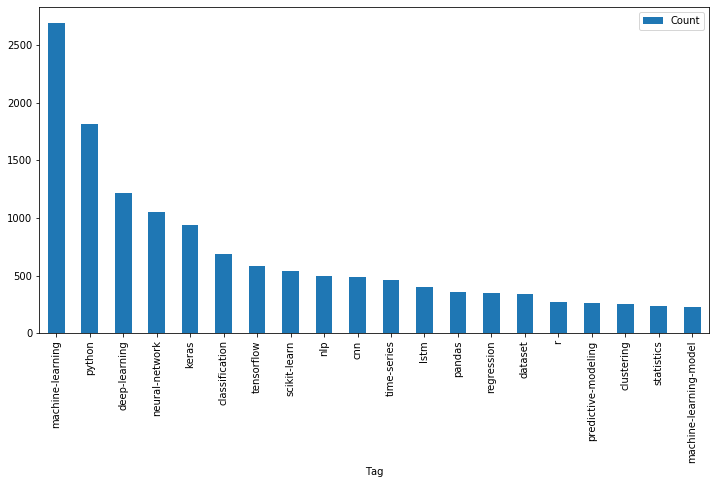

In [5]:
#create a dictionary to store tag counts
tag_use_counts = {}

#create a function to count the occurence of each tag
def count_tag_use(row):
    item_list = row.split(',')
    for item in item_list:
        if item in tag_use_counts:
            tag_use_counts[item] += 1
        else:
            tag_use_counts[item] = 1

#apply function to the Tags column
questions['Tags'].apply(count_tag_use)

#sort the dictionary adn return the top 20 tags
top_twenty_tags = sorted(tag_use_counts.items(), key = lambda x: x[1], reverse =True)[:20]

#convert to a dataframe
top_twenty = pd.DataFrame(top_twenty_tags, columns=['Tag', 'Count'])

#display as a bar graph
top_twenty.plot.bar(x='Tag', y='Count', figsize=(12,6))

                 Tag  View_Count
0             python      537585
1   machine-learning      388499
2              keras      268608
3      deep-learning      233628
4             pandas      201787
5     neural-network      185367
6       scikit-learn      128110
7         tensorflow      121369
8     classification      104457
9          dataframe       89352
10              lstm       74458
11               nlp       71382
12               cnn       70349
13       time-series       64134
14             numpy       49767
15        regression       49451
16           dataset       43151
17           pytorch       40240
18               csv       38654
19        clustering       33928


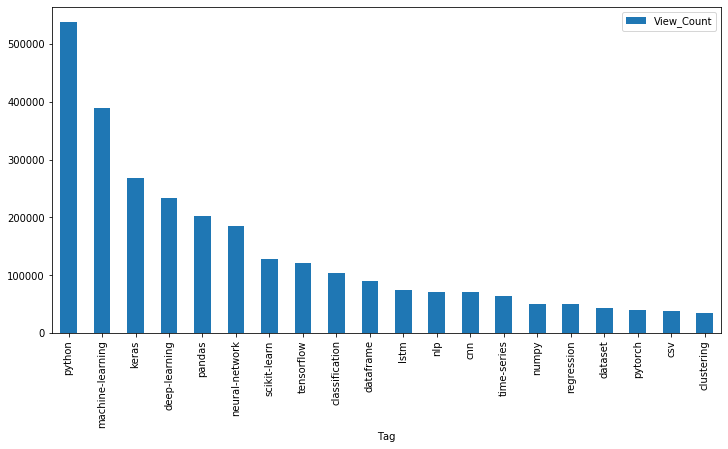

In [6]:
#create a dictionary to store the tag view counts
tag_view_counts = {}

#create a function to get view counts
def get_view_counts(row):
    tag_list = row['Tags'].split(',')
    for tag in tag_list:
        if tag in tag_view_counts:
            tag_view_counts[tag] += row['ViewCount']
        else:
            tag_view_counts[tag] = row['ViewCount']

#apply the function
questions.apply(get_view_counts, axis=1)     

#sort the dictionary and return the top 20 view counts
top_twenty_view_counts = sorted(tag_view_counts.items(), key = lambda x: x[1], reverse =True)[:20]

#create dataframe of top twenty view counts
top_twenty_views = pd.DataFrame(top_twenty_view_counts, columns = ['Tag', 'View_Count'])
    
print(top_twenty_views)

#Display as a bar graph
top_twenty_views.plot.bar(x='Tag', y='View_Count', figsize=(12,6))

## Correlation Between Tag Use and Views

It's pretty easy to see both the tag use and view count are closely correlated.  Machine-learning and python are the top two results in both lists (although they are transposed) and deep-learning, keras and neural-network are close behind. At a glance, it seems the most popular topics converge around machine-learning, and with python in particular. To confirm this, we'll run the following query on the DSSE to obtain all of the questions ever asked:

**<code>
SELECT Id, CreationDate, Tags
    FROM posts
   WHERE PostTypeId = 1;
</code>**

then we'll use the results to track the interest in machine-learning across time.


In [7]:
#read the new dataset in
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [8]:
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


To plot the number of machine-learning questions per month, we'll first define a list of machine-learning specific terms. After that, we'll extract the year and month from the *CreationDate* column and aggragate the number of questions around each month. From there, we'll plot the questions and see if machine-learning is a passing fad, or if it's worth investing in courses specific to these topics.  

**Note:** We've purposefully left python out of this list as it's not specific to machine-learning. However, We've left in keras, tensorflow, and scitkit-learn, because while they are python libraries, they are used specifically for machine-learning. 

In [9]:
#clean the tags column
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','') 

#create a list of machine-learning terms
ml_tags = ['machine-learning','machine-learning-model',
           'neural-network', 'deep-learning', 'keras',
          'scikit-learn', 'tensorflow']

#define function to test if row contains machine-learning terms
def ml_or_not(row):
     for item in row.split(','):
        if item in ml_tags:
            return 1
     return 0

#apply the function to the 'Tags' column
all_questions['ml_question'] = all_questions['Tags'].apply(ml_or_not).astype('int64')


In [10]:
all_questions.head()

,Id,CreationDate,Tags,ml_question
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability",1
1,45418,2019-02-12 00:50:39,neural-network,1
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot",0
3,45426,2019-02-12 04:51:49,keras,1
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s...",1


In [11]:
#define functions to extract year and month from CreationDate
def get_year(row):
    return row.year

def get_month(row):
    return row.month

#apply functions
all_questions['year'] = all_questions['CreationDate'].apply(get_year)
all_questions['month'] = all_questions['CreationDate'].apply(get_month)

#drop the Id column
all_questions.drop(columns=['Id'], inplace = True)

In [12]:
all_questions.tail()

,CreationDate,Tags,ml_question,year,month
21571,2018-08-15 14:19:01,"statistics,data",0,2018,8
21572,2018-08-15 14:40:27,"machine-learning,neural-network,classifier",1,2018,8
21573,2018-08-15 14:53:43,"machine-learning,classification",1,2018,8
21574,2018-08-14 19:31:43,"tensorflow,python",1,2018,8
21575,2018-08-15 17:01:29,"python,deep-learning,tensorflow",1,2018,8


In [13]:
#initialize a pivot table to see the number of ml questions per month
table = all_questions.pivot_table(index = ['year', 'month'], aggfunc=np.sum )
table


ml_question
year month             
2014 5               11
     6               33
     7               28
     8               24
     9               19
...                 ...
2019 9              395
     10             348
     11             377
     12             398
2020 1              243

[69 rows x 1 columns]

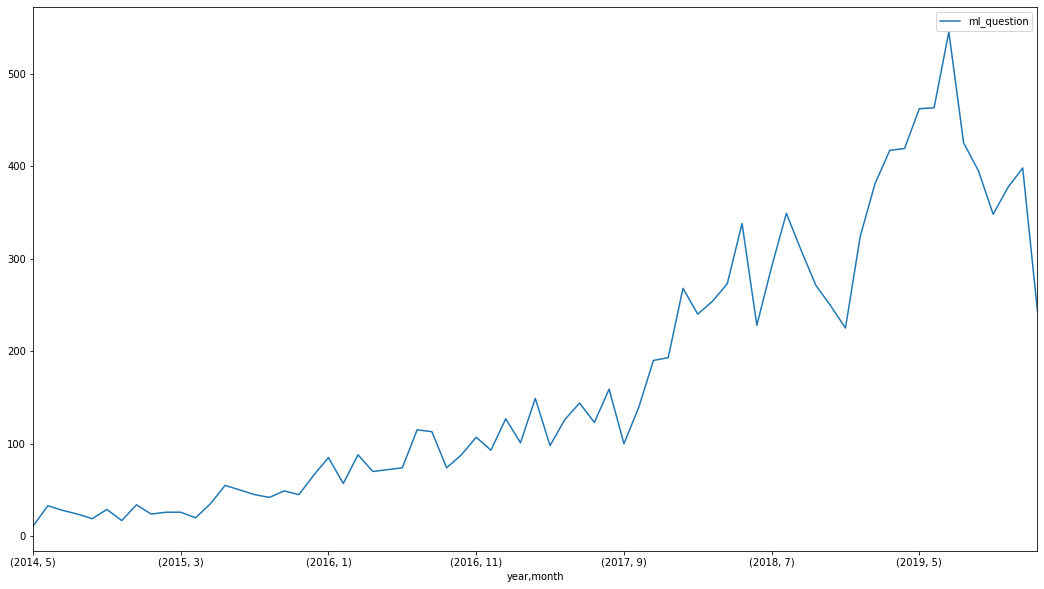

In [19]:
#plot the number of questions per month
ax = table.plot(kind='line', figsize=(18, 10))

## Results

Looking at our graph, it seems machine-learning specific questions peaked around June of 2019; however, even the most recent data shows a large number of questions centered around these topics, and the overall trend is rising. Is it a fad? Will the machine-learning 'bubble' pop? Possibly. For now, though, it seems worthwhile to invest in machine-learning courses as there is obviously still a demand for this knowledge.